# **-- Estudo comparativo de técnicas de navegação para robotica na agricultura --**

aplicar filtro morfologico, filtro de Kalman

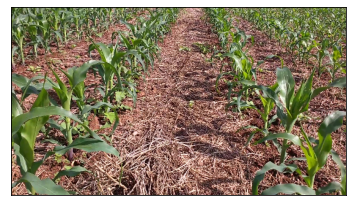

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

fatorResize = 3.5

img_original = cv.imread('/content/drive/MyDrive/Faculdade/TG/Imagens/frame.jpg')
img_original = cv.resize(img_original, (int(img_original.shape[1]/fatorResize),int(img_original.shape[0]/fatorResize)))

imgRGB = cv.cvtColor(img_original, cv.COLOR_BGR2RGB)
# img_original = cv.medianBlur(img_original,11)
plt.imshow(imgRGB, cmap='gray') , plt.xticks([]), plt.yticks([]), plt.show()
# histograma(img_original)

altura = img_original.shape[0]
largura = img_original.shape[1]

# 60,70,50 - 
limitesCores = [([0, 0, 0], [100, 240, 240])]; blur = 65; largIni = -20; largFinal = largura + 20; alturaCorte = -50  # Parametros Vid 2
# lower = [0, 0, 0] ; upper = [24, 240, 240]  ; blur = 31 ; largIni= 30 ; largFinal = 200 ; alturaCorte = 60 # Parametros Fig 2
# lower = [150, 0, 0] ; upper = [255, 240, 240]  ; blur = 45 ; largIni= -200 ; largFinal = largura+200 ; alturaCorte = 65 ; # Parametros Fig 3
# lower = [0, 0, 0] ; upper = [24, 240, 240]  ; blur = 65 ; largIni= 300 ; largFinal = 900 ; alturaCorte = 300 ; # Parametros Fig 4
# lower = [0, 0, 0] ; upper = [24, 240, 240]  ; blur = 155 ; largIni= -300 ; largFinal = largura+300 ; alturaCorte = 150 ; # Parametros Fig 5
# limitesCores = [ ([0, 0, 0], [249, 30, 190]) ] ; blur = 125 ; largIni= -300 ; largFinal = largura+300 ; alturaCorte = 500 ; # Parametros Fig 6
# limitesCores = [ ([18, 0, 0], [120, 250, 200]) ] ; blur = 45 ; largIni= 0 ; largFinal = largura+300 ; alturaCorte = 110 ; # Parametros Fig 17

## **Segmentação de Cores - Cor Verde**

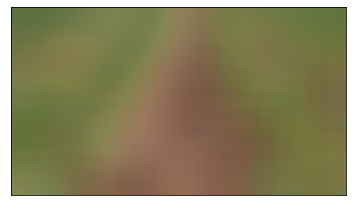

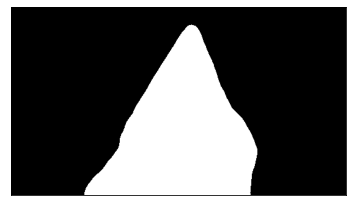

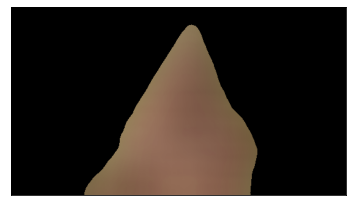

(<matplotlib.image.AxesImage at 0x7f9bf36769e8>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [ ]:

img_hsv = cv.cvtColor(img_original, cv.COLOR_RGB2HSV)
# img_blur = cv.medianBlur(img_hsv, 125)
img_blur = cv.GaussianBlur(img_hsv, (185,255),0)

img_blurRGB = cv.cvtColor(img_blur, cv.COLOR_HSV2BGR)
plt.imshow(img_blurRGB, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

mascaraFinal = np.zeros(img_blur.shape[:2], dtype="uint8")   #Inicializando a mascara final
# loop over the boundaries
for (lower, upper) in limitesCores:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")

    # find the colors within the specified boundaries
    mascara = cv.inRange(img_blur, lower, upper)

    # merge the mask into the accumulated masks
    mascaraFinal = cv.bitwise_or(mascaraFinal, mascara)

mascaraFinal = cv.bitwise_not(mascaraFinal)
res = cv.bitwise_and(img_blur, img_blur, mask=mascaraFinal)
img_filt = cv.cvtColor(res, cv.COLOR_HSV2BGR)


plt.imshow(mascaraFinal, cmap='gray') , plt.xticks([]), plt.yticks([]), plt.show()
res = cv.bitwise_and(img_hsv, img_hsv, mask=mascaraFinal)
plt.imshow(img_filt, cmap='gray') , plt.xticks([]), plt.yticks([]), plt.show()

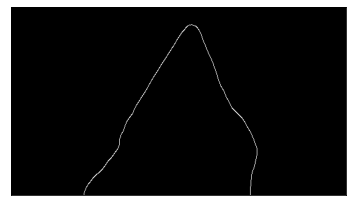

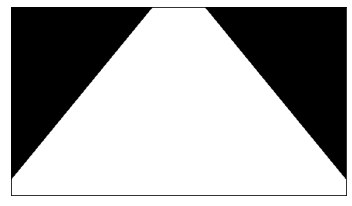

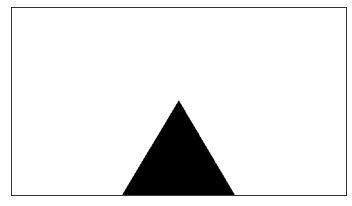

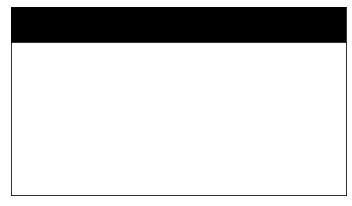

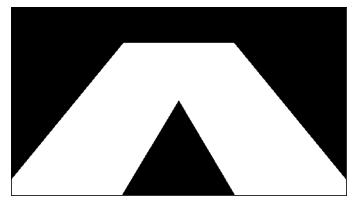

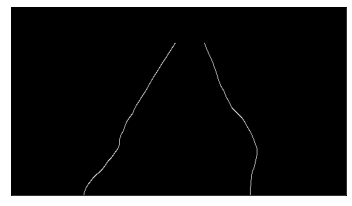

(<matplotlib.image.AxesImage at 0x7f9bf34f5dd8>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [ ]:
img_canny = cv.Canny(img_filt, 120, 120)

plt.imshow(img_canny, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

triangulo1 = np.array([(largIni, altura), (largFinal, altura), (largura/2, alturaCorte)])
triangulo2 = np.array([(int(largura/3), altura), (int(largura*2/3), altura), (int(largura/2), altura*1/2)])
retangulo = np.array([(0, altura), (largura, altura),(largura, 60), (0, 60)])
mascara1 = np.zeros_like(img_canny)
mascara2 = np.zeros_like(img_canny)
mascara3 = np.zeros_like(img_canny)
cv.fillPoly(mascara1, np.int32([triangulo1]), (255,255,255))
plt.imshow(mascara1, cmap='gray'), plt.xticks([]), plt.yticks([]),plt.show()
img_mascarada1 = cv.bitwise_and(img_canny, mascara1)
cv.fillPoly(mascara2, np.int32([triangulo2]), (255,255,255))
mascara2 = cv.bitwise_not(mascara2)
plt.imshow(mascara2, cmap='gray'), plt.xticks([]), plt.yticks([]),plt.show()
cv.fillPoly(mascara3, np.int32([retangulo]), (255,255,255))
plt.imshow(mascara3, cmap='gray'), plt.xticks([]), plt.yticks([]),plt.show()

mascaraFinal = cv.bitwise_and(cv.bitwise_and(mascara1, mascara2), mascara3)
plt.imshow(mascaraFinal, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

img_mascaradaFinal = cv.bitwise_and(img_canny, mascaraFinal)

plt.imshow(img_mascaradaFinal, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.show()

# **Obtendo as coordenadas das Linhas Médias**

In [ ]:

def obter_coordenadas(img, parametros_linha):
    # Obter as coordenadas dos pontos da linha
    # Equação da Linha (y = ax + b)
    a, b = parametros_linha
    y1 = img.shape[0]
    y2 = int(y1 * 0.5)  # Linha média vai até 3/5 da imagem
    x1 = int((y1 - b) / a)
    x2 = int((y2 - b) / a)
    return np.array([x1, y1, x2, y2])

**Todas as Linhas Obtidas:**

[[186 195 258  75]]
[[188 190 245  95]]
[[316  60 353 151]]
[[122 297 175 231]]
[[391 301 402 240]]
[[123 294 169 240]]


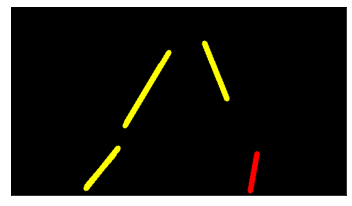

(<matplotlib.image.AxesImage at 0x7f9beac5cd68>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [ ]:
linhas = cv.HoughLinesP(img_mascaradaFinal, 2, np.pi / 180, 50, np.array([]), minLineLength=10, maxLineGap=70)

imgLinhas = np.zeros_like(img_original)
# Obter as linhas medias de um conjunto de linhas
esquerda = []
direita = []
for linha in linhas:
    print(linha)
    x1, y1, x2, y2 = linha.reshape(4)
    parametros = np.polyfit((x1, x2), (y1, y2), 1)  # Retorna os parametros da equação da reta
    # Parametros da equação da reta (y = ax + b)
    a = parametros[0]
    b = parametros[1]
    if (a < -0.6 and a > -6 and x1 < largura/2) or (a > 0.6 and a < 6 and x1 > largura/2):
      cv.line(imgLinhas, (x1, y1), (x2, y2), (0, 255, 255), 7)
    else:
      cv.line(imgLinhas, (x1, y1), (x2, y2), (0, 0, 255), 7)


imgLinhas = cv.cvtColor(imgLinhas, cv.COLOR_BGR2RGB)
plt.imshow(imgLinhas), plt.xticks([]), plt.yticks([]), plt.show()

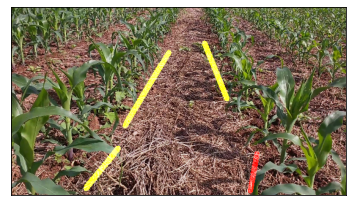

(<matplotlib.image.AxesImage at 0x7f9beac554e0>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [ ]:
imgComLinhas = cv.addWeighted(imgRGB, 0.9, imgLinhas, 1, 1)  # Adicionando as linhas à imagem original
# imgComLinhas = cv.cvtColor(imgComLinhas, cv.COLOR_BGR2RGB)

plt.imshow(imgComLinhas, cmap='gray') , plt.xticks([]), plt.yticks([]), plt.show()

[[186 195 258  75]]
-1.6666666666666665
[[188 190 245  95]]
-1.6666666666666654
[[316  60 353 151]]
2.459459459459455
[[122 297 175 231]]
-1.2452830188679251
[[391 301 402 240]]
-5.545454545454498
[[123 294 169 240]]
-1.1739130434782612


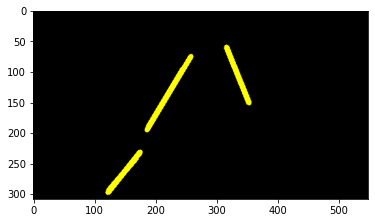

(<matplotlib.image.AxesImage at 0x7f9beac15dd8>, None)

In [ ]:
linhas = cv.HoughLinesP(img_mascaradaFinal, 2, np.pi / 180, 50, np.array([]), minLineLength=10, maxLineGap=70)

imgLinhas = np.zeros_like(img_original)
# Obter as linhas medias de um conjunto de linhas
esquerda = []
direita = []
for linha in linhas:
    print(linha)
    x1, y1, x2, y2 = linha.reshape(4)
    parametros = np.polyfit((x1, x2), (y1, y2), 1)  # Retorna os parametros da equação da reta
    # Parametros da equação da reta (y = ax + b)
    a = parametros[0]
    b = parametros[1]
    print(a)
    if a < -0.6 and a > -6 and x1 < largura/2:  # Se a inclinação for menor do que 0, a inclinação está para a esquerda, se for maior a inclinação está para a direita
      esquerda.append((a, b))
      cv.line(imgLinhas, (x1, y1), (x2, y2), (0, 255, 255), 7)
    elif a > 0.6 and a < 6 and x1 > largura/2:
      direita.append((a, b))
      cv.line(imgLinhas, (x1, y1), (x2, y2), (0, 255, 255), 7)
media_valores_esquerda = np.average(esquerda, axis=0)
media_valores_direita = np.average(direita, axis=0)
linha_esquerda = obter_coordenadas(img_original, media_valores_esquerda)
linha_direita = obter_coordenadas(img_original, media_valores_direita)

linhas = np.array([linha_esquerda, linha_direita])


imgLinhas = cv.cvtColor(imgLinhas, cv.COLOR_BGR2RGB)
plt.imshow(imgLinhas), plt.show()

[[115 308 222 154]
 [416 308 354 154]]


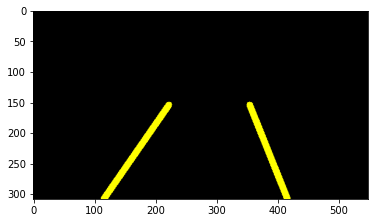

(<matplotlib.image.AxesImage at 0x7f9bf34b2f60>, None)

In [ ]:
# Obter a média das linhas desenhadas em um fundo preto
larguraLinha = 10
imgLinhas2 = np.zeros_like(img_original)

if linhas is not None:
  print(linhas)
  for lin in linhas:
      x1, y1, x2, y2 = lin
      cv.line(imgLinhas2, (x1, y1), (x2, y2), (0, 255, 255), larguraLinha)
  
imgLinhas2 = cv.cvtColor(imgLinhas2, cv.COLOR_BGR2RGB)
plt.imshow(imgLinhas2), plt.xticks([]), plt.yticks([]), plt.show()

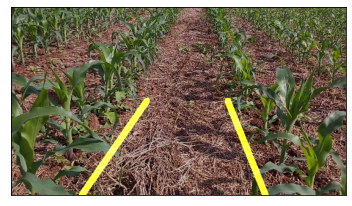

(<matplotlib.image.AxesImage at 0x7f9bf342cb70>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [ ]:
imgComLinhas = cv.addWeighted(imgRGB, 0.8, imgLinhas, 1, 1)  # Adicionando as linhas à imagem original
# imgComLinhas = cv.cvtColor(imgComLinhas, cv.COLOR_BGR2RGB)

plt.imshow(imgComLinhas, cmap='gray') , plt.xticks([]), plt.yticks([]), plt.show()

In [ ]:
x1 = 0 ; y1 = 10
x2 = 1; y2 = 10000  #a = (y2-y1)/(x2-x1)    b = y quando x=0
parametros = np.polyfit((x1, x2), (y1, y2), 1)  # Retorna a inclinação e a coordenada y    
print(parametros)    

[9990.   10.]
